In [1]:
import numpy as np
import pandas as pd

# x = 2 * np.random.randn(100, 5)
# y = 2.5382 * np.cos(x[:, 3]) + x[:, 3] ** 2 - 0.5

df = pd.read_csv("spring_5_200.csv")
print(df)

X = df[['dx', 'dy', 'r', 'm1', 'm2']]
y = df[['e89']]

       Unnamed: 0       e89        dx        dy         r        m1         m2
0               0  0.734544 -0.046599 -2.075273  2.075796  0.151869   2.589533
1               1  0.270417 -0.529381  0.137611  0.546975  0.151869   0.764438
2               2 -0.052496 -0.589519  0.882530  1.061316  0.151869   2.722372
3               3 -0.483839 -1.736288  0.470309  1.798858  0.151869   5.528524
4               4 -0.698761  0.046599  2.075273  2.075796  2.589533   0.151869
...           ...       ...       ...       ...       ...       ...        ...
19995       19995  0.611558 -0.875394 -2.131566  2.304320  0.173771   0.664806
19996       19996  0.273997  2.825666  1.241855  3.086518  0.664806   0.795343
19997       19997  0.159040  0.114863  0.722587  0.731660  0.664806   0.623200
19998       19998  0.061865  1.627035  0.881407  1.850438  0.664806  13.475355
19999       19999 -0.599184  0.875394  2.131566  2.304320  0.664806   0.173771

[20000 rows x 7 columns]


In [2]:
from pysr import PySRRegressor

model = PySRRegressor(
    model_selection="best",
    niterations=200,
    # binary_operators=["+", "*"],
    # unary_operators=["cos", "exp", "sin", "inv(x) = 1/x"],
    # extra_sympy_mappings={"inv": lambda x: 1/x},
    loss="L1DistLoss()",
    batching=True
)

model.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pysr/sr.py:1226: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                       0.0041677244   
	1        0.121868                                 (dy * -0.23715009)   
	2        0.112613                          ((dy - dx) * -0.21819872)   
	3        0.203038                    ((r * (dy - dx)) * -0.12218778)   
	4  >>>>  0.152719      (((dy - (dx * 0.6499078)) * -0.15485694) * r)   
	5        0.000827  ((((dy - (dx * 0.6499078)) * -0.15485694) * r)...   
	6        0.024899  (((dy - (dx - (0.494693 * dy))) * (-0.49040055...   
	7        0.020117  (((dy - (dx - (0.494693 * dy))) * ((-0.5548256...   
	8        0.069496  (((dy - (dx - (0.494693 * dy))) * (((-0.554825...   
	
	       loss  complexity  
	0  0.336622           1  
	1  0.263809           3  
	2  0.210608           5  
	3  0.140320           7  
	4  0.103388           9  
	5  0.103217          11  
	6  0.098203          13  
	7  0.094330          15  
	8  0.082089          17  
]

In [3]:
print(model)

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                       0.0041677244   
	1        0.121868                                 (dy * -0.23715009)   
	2        0.112613                          ((dy - dx) * -0.21819872)   
	3        0.203038                    ((r * (dy - dx)) * -0.12218778)   
	4  >>>>  0.152719      (((dy - (dx * 0.6499078)) * -0.15485694) * r)   
	5        0.000827  ((((dy - (dx * 0.6499078)) * -0.15485694) * r)...   
	6        0.024899  (((dy - (dx - (0.494693 * dy))) * (-0.49040055...   
	7        0.020117  (((dy - (dx - (0.494693 * dy))) * ((-0.5548256...   
	8        0.069496  (((dy - (dx - (0.494693 * dy))) * (((-0.554825...   
	
	       loss  complexity  
	0  0.336622           1  
	1  0.263809           3  
	2  0.210608           5  
	3  0.140320           7  
	4  0.103388           9  
	5  0.103217          11  
	6  0.098203          13  
	7  0.094330          1

In [4]:
print(model.latex_table())

\usepackage{breqn}
\usepackage{booktabs}

...

\begin{table}[h]
\begin{center}
\begin{tabular}{@{}cccc@{}}
\toprule
Equation & Complexity & Loss & Score \\
\midrule
$y = 0.00417$ & $1$ & $0.337$ & $0.0$ \\
$y = - 0.237 dy$ & $3$ & $0.264$ & $0.122$ \\
$y = 0.218 dx - 0.218 dy$ & $5$ & $0.211$ & $0.113$ \\
$y = - 0.122 r \left(- dx + dy\right)$ & $7$ & $0.140$ & $0.203$ \\
$y = r \left(0.101 dx - 0.155 dy\right)$ & $9$ & $0.103$ & $0.153$ \\
$y = r \left(0.101 dx - 0.155 dy\right) + 0.00319$ & $11$ & $0.103$ & $0.000827$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y = - 0.133 \left(- dx + 1.49 dy\right) \left(r - 0.490\right) \end{dmath*} \end{minipage} & $13$ & $0.0982$ & $0.0249$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y = - 0.133 \left(- dx + 1.49 dy\right) \left(r - \frac{0.555}{r}\right) \end{dmath*} \end{minipage} & $15$ & $0.0943$ & $0.0201$ \\
\begin{minipage}{0.8\linewidth} \vspace{-1em} \begin{dmath*} y = - 0.133 \left(- dx + 1.49 dy

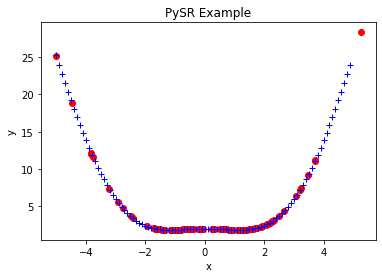

In [14]:
import matplotlib.pyplot as plt

plt.title("PySR Example")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x[:,3], y, 'ro', label="data")

def f(x):
    y = x**2 + 2.54*np.cos(x) - 0.5
    return y

xf = np.arange(-5, +5, 0.1) 
plt.plot(xf, f(xf), 'b+', label="fit")
plt.show()